In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import adjusted_rand_score
from sklearn import cluster

In [5]:
# 产生分隔的高斯分布的聚类簇 样本分布见 6-1
# centers 核心点的数组
# num 样本数
# std 每簇的标准差
def create_data(centers,num=1000,std=0.7):
    x, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return x, labels_true

In [6]:
def test_AC(*data):
    x,labels_true = data
    ac = cluster.AgglomerativeClustering()
    predicted_labels = ac.fit_predict(x)
    print('ARI:{0}'.format(adjusted_rand_score(labels_true,predicted_labels))) #ARI 可以理解为聚类效果 越大越好

In [7]:
x, labels_true = create_data(((1,1),(2,2),(1,2),(10,20)),1000,0.5)
test_AC(x, labels_true)

ARI:0.33266533066132264


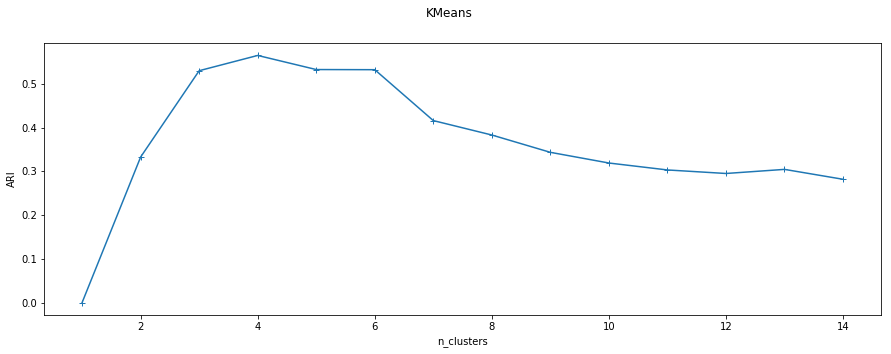

In [11]:
# 簇数量的影响
def test_AC_nclusters(*data):
    x,labels_true = data
    nums = range(1,15)
    ARIs =[]
    for num in nums:
        ac = cluster.AgglomerativeClustering(n_clusters=num)
        predicted_labels = ac.fit_predict(x)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        
    # 绘图
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    ax = fig.add_subplot(111)
    ax.plot(nums, ARIs, marker='+')
    ax.set_xlabel('n_clusters')
    ax.set_ylabel('ARI')
    fig.suptitle('KMeans')
    plt.show()

x, labels_true = create_data(((1,1),(2,2),(1,2),(10,20)),1000,0.5)
test_AC_nclusters(x, labels_true)

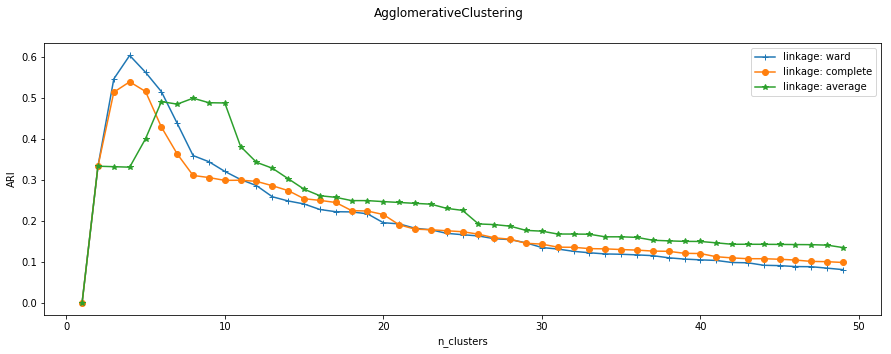

In [14]:
# 链接方式的影响
def test_AC_linkage(*data):
    x,labels_true = data
    nums = range(1,50)
    # 绘图
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    ax = fig.add_subplot(111)
    
    Linkages = ['ward','complete','average']
    markers = '+o*'
    for i, linkage in enumerate(Linkages):
        ARIs =[]
        for num in nums:
            ac = cluster.AgglomerativeClustering(n_clusters=num, linkage=linkage)
            predicted_labels = ac.fit_predict(x)
            ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        ax.plot(nums, ARIs, marker=markers[i], label='linkage: {0}'.format(linkage))
        
    ax.set_xlabel('n_clusters')
    ax.set_ylabel('ARI')
    ax.legend(loc='best')
    fig.suptitle('AgglomerativeClustering')
    plt.show()

x, labels_true = create_data(((1,1),(2,2),(1,2),(10,20)),1000,0.5)
test_AC_linkage(x, labels_true)